[['서울', '9736962', '658355', '813563', '1455903', '1505729', '1563968', '1539385', '1200518', '688818', '263939', '40404', '6380'], ['부산', '3410925', '241624', '281120', '434692', '431911', '518321', '580966', '511174', '285602', '109312', '14396', '1807'], ['대구', '2432883', '186623', '234528', '321487', '303397', '391997', '428622', '311274', '171217', '74227', '8817', '694'], ['인천', '2954955', '239941', '281097', '405835', '417708', '490716', '515758', '344843', '172269', '74306', '11574', '908'], ['광주', '1456121', '125396', '162728', '207554', '191432', '244903', '234048', '155056', '91020', '38050', '5529', '405'], ['대전', '1473125', '120476', '151861', '212143', '199106', '242381', '243526', '170291', '88289', '39190', '5523', '339'], ['울산', '1145710', '103399', '115623', '147745', '158271', '190698', '211255', '136520', '57438', '21610', '2991', '160'], ['세종', '343788', '47454', '40574', '36273', '61442', '65714', '42907', '27813', '13609', '6863', '1084', '55'], ['경기도', '13265377

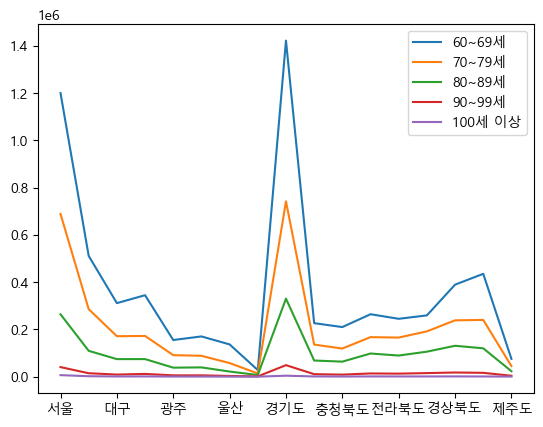

In [29]:
import csv
import pandas as pd
import matplotlib.pyplot
from matplotlib import rc
import copy

rc('font',family='Malgun Gothic')

def get_original_list(list_data):
    for line in lines:
        list_data.append(line[:])

def get_list(list_data):
    list_tmp = []
    for j in range(13):
        temp = []
        for i in range(len(list_data)):
            temp.append(list_data[i][j])
        list_tmp.append(temp)
    return list_tmp

def get_dict(list_data,keys,dict_data):
    dict_data.update({keys[0]:list_data[0]})
    for i in range(1,13):
        temp = []
        for j in range(17):
            temp.append(int(list_data[i][j]))           
        dict_data.update({keys[i]:temp})


# csv 파일 open
f = open('population_age_2020.csv','r',encoding='utf-8')
lines = csv.reader(f)
header = next(lines)

# 문제 1 # 2차원 리스트에 저장한 다음 실행 결과를 출력하시오.
list_original_data = []
get_original_list(list_original_data)
print(list_original_data)

print()
print('-'*100)
print()


#문제 2 # 2차원 리스트 데이터에 대해 열과 행을 바꾸어 출력하시오.
list_data = copy.deepcopy(list_original_data)
#print(len(list_data[0]))  /=> 13
list_transposed_data = get_list(list_data)
print(list_transposed_data)

print()
print('-'*100)
print()

# 문제 3 # 위의 2번 리스트 데이터를 딕셔너리 데이형으로 변환하는 프로그램을 작성하여 출력하시오.
dict_data = {}
keys = ['지역','총인구수','0~9세','10~19세','20~29세','30~39세','40~49세','50~59세','60~69세','70~79세','80~89세','90~99세','100세 이상']
get_dict(list_transposed_data,keys,dict_data)
print(dict_data)

print()
print('-'*100)
print()

# 문제 4-1 # 3번의 딕셔너리 데이터를 DataFrame 에 저장하시오

df = pd.DataFrame(dict_data,index=['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주도'])
print(df)

print()
print('-'*100)
print()

# 문제 4-2 #  딕셔너리 데이터를 선그래프로 표현하시오. (60세 ~ 100세)

df2 = df.iloc[:,[8,9,10,11,12]]
lines = df2.plot.line()

# 문제 5 # 4번의 데이터프레임에 저장된 데이터를 '100세 이상'열을 기준으로 내림차순으로 정렬하여 출력하시오.

df3 = df.iloc[:,[0,12,1]]
rank = df3.sort_values(by=['100세 이상'], ascending=False)
print(rank)
